In [72]:
pd.set_option('display.height', 1000) 
pd.set_option('display.max_rows', 500) 
pd.set_option('display.max_columns', 500) 
pd.set_option('display.width', 1000)

height has been deprecated.



In [56]:
raw_data = pd.read_table("amazon_cells_labelled.txt", header=None)

### Data
Data was acuired from the UCI Machine Learning Repository and contains sentences taken from Amazon reviews that are labeled as having either a positive(1) or negative(0) sentenment.  There are 1000 rows of data

In [58]:
len(raw_data)

1000

In [59]:
data = raw_data

In [60]:
data.head()

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [61]:
data.columns=["sentence","sentiment"]

In [64]:
positive = data.loc[data["sentiment"]== 1]

In [65]:
positive

,sentence,sentiment
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
4,The mic is great.,1
7,If you are Razr owner...you must have this!,1
10,And the sound quality is great.,1
11,He was very impressed when going from the orig...,1
13,Very good quality though,1
15,Highly recommend for any one who has a blue to...,1
17,So Far So Good!.,1
18,Works great!.,1


In [42]:
count = pd.DataFrame()

In [88]:
keywords = ["good","great", "Great", "works","Works","loved","Loved","quality","Quality","recommend","Recommend","very","Very","Good","love","Love","easy","Easy","happy","Happy","Excellent","excellent","great.","Great."]

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    data[str(key)] = data.sentence.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [73]:
count = positive.sentence.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0)
count = count.sort_values()
count[100:]

perfectly,                     1.0
perfectly                      1.0
penny.                         1.0
peeling,                       1.0
peachy-keen.                   1.0
patient,                       1.0
optimal                        1.0
passed                         1.0
palmtop/camera/cellphone,      1.0
pair                           1.0
pain                           1.0
pad                            1.0
packaged,                      1.0
package.                       1.0
owning                         1.0
pants                          1.0
operate                        1.0
open                           1.0
oozes                          1.0
nice,                          1.0
next                           1.0
new.                           1.0
needs.Handsfree                1.0
needed.                        1.0
needed,                        1.0
neat                           1.0
nice.                          1.0
nearly                         1.0
motor               

In [78]:
data["sentiment"] = (data["sentiment"] == 1)

In [89]:
data

,sentence,sentiment,good,great,Great,works,loved,quality,recommend,very,Good,Works,Loved,Quality,Recommend,Very,love,Love,easy,Easy,happy,Happy,Excellent,excellent,great.,Great.
0,So there is no way for me to plug it in here i...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
2,Great for the jawbone.,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,I have to jiggle the plug to get it to line up...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,If you have several dozen or several hundred c...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,If you are Razr owner...you must have this!,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,"Needless to say, I wasted my money.",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,What a waste of money and time!.,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


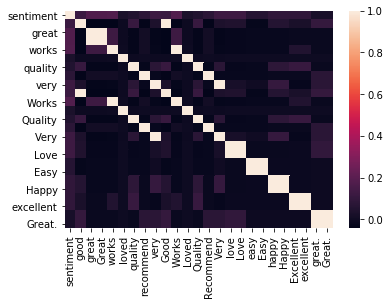

In [90]:
sns.heatmap(data.corr())

In [91]:
analysis_data = data[keywords]
target = data["sentiment"]

In [92]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(analysis_data,target)
y_pred= bnb.predict(analysis_data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 347


In [95]:
from sklearn.naive_bayes import GaussianNB
bnb = GaussianNB()
bnb.fit(analysis_data,target)
y_pred= bnb.predict(analysis_data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 401
